# Задание

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

Приведенная схема исследования является рекомендуемой. В зависимости от решаемой задачи возможны модификации.

## 1. Выбор и подготовка набора данных

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier

В качестве набора данных будем использовать набор данных, состоящий из песен с музыкального сервиса Spotify (https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)

In [2]:
train_data = pd.read_csv('../data/SpotifyFeatures.csv')
train_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Размер набора:

In [3]:
train_data.shape

(232725, 18)

Удалим лишние столбцы:

In [4]:
train_data = train_data.filter(['genre', 'artist_name', 'track_name', 'energy', 'loudness', 'speechiness', 'liveness', 'popularity', 'danceability', 'duration_ms', 'instrumentalness', 'acousticness'])
train_data.head()

,genre,artist_name,track_name,energy,loudness,speechiness,liveness,popularity,danceability,duration_ms,instrumentalness,acousticness
0,Movie,Henri Salvador,C'est beau de faire un Show,0.910,-1.828,0.0525,0.3460,0,0.389,99373,0.000,0.611
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0.737,-5.559,0.0868,0.1510,1,0.590,137373,0.000,0.246
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0.131,-13.879,0.0362,0.1030,3,0.663,170267,0.000,0.952
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0.326,-12.178,0.0395,0.0985,0,0.240,152427,0.000,0.703
4,Movie,Fabien Nataf,Ouverture,0.225,-21.150,0.0456,0.2020,4,0.331,82625,0.123,0.950


Итоговый набор содержит следующие колонки:
    
* genre - жанр песни
* artist_name - исполнитель песни
* track_name - название песни
* energy - энергичность
* loudness - громкость
* speechiness - показатель количества слов в песне
* liveness - показатель того, что песня была записана при аудитории
* popularity - показатель популярности песни по 10-балльной шкале
* danceability - показатель стабильности песни для танца
* duration_ms - длительность песни (в мс)
* instrumentalness - показатель вокала в песне
* acousticness - акустичность (1.0 - песня в акустической версии)

Новое количество колонок:

In [5]:
train_data.shape[1]

12

Переименуем названия столбцов:

In [6]:
train_data.rename(columns={'genre': 'Genre', 'artist_name': 'Artist', 'acousticness': 'Acousticness', 'instrumentalness': 'Instrumentalness', 'track_name': 'Track', 'energy': 'Energy', 'loudness': 'Loudness', 'speechiness': 'Speechiness', 'liveness': 'Liveness', 'danceability': 'Danceability', 'duration_ms': 'Duration', 'popularity': 'Popularity'}, inplace=True)
train_data.head()

,Genre,Artist,Track,Energy,Loudness,Speechiness,Liveness,Popularity,Danceability,Duration,Instrumentalness,Acousticness
0,Movie,Henri Salvador,C'est beau de faire un Show,0.910,-1.828,0.0525,0.3460,0,0.389,99373,0.000,0.611
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0.737,-5.559,0.0868,0.1510,1,0.590,137373,0.000,0.246
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0.131,-13.879,0.0362,0.1030,3,0.663,170267,0.000,0.952
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0.326,-12.178,0.0395,0.0985,0,0.240,152427,0.000,0.703
4,Movie,Fabien Nataf,Ouverture,0.225,-21.150,0.0456,0.2020,4,0.331,82625,0.123,0.950


## 2. Разведочный анализ

Проверим пропуски:

In [7]:
train_data.isnull().sum()

Genre               0
Artist              0
Track               0
Energy              0
Loudness            0
Speechiness         0
Liveness            0
Popularity          0
Danceability        0
Duration            0
Instrumentalness    0
Acousticness        0
dtype: int64

Как видим, пропуски отсутствуют

Количество уникальных музыкальных жанров:

In [8]:
train_data['Genre'].nunique()

27

Количество песен каждого жанра:

In [9]:
popular_genre=train_data.groupby('Genre').size().unique
popular_genre

<bound method Series.unique of Genre
A Capella            119
Alternative         9263
Anime               8936
Blues               9023
Children's Music    5403
Children’s Music    9353
Classical           9256
Comedy              9681
Country             8664
Dance               8701
Electronic          9377
Folk                9299
Hip-Hop             9295
Indie               9543
Jazz                9441
Movie               7806
Opera               8280
Pop                 9386
R&B                 8992
Rap                 9232
Reggae              8771
Reggaeton           8927
Rock                9272
Ska                 8874
Soul                9089
Soundtrack          9646
World               9096
dtype: int64>

Для решения задачи классификации выберем два жанра - поп (Pop) и рок (Rock):

In [10]:
top_genres = ['Pop', 'Rock']

In [11]:
train_data = train_data[train_data['Genre'].isin(top_genres)]
train_data['Genre'].unique()

array(['Pop', 'Rock'], dtype=object)

Проверим размер набора:

In [12]:
train_data.shape

(18658, 12)

Подсчитаем количество исполнителей:

In [13]:
train_data['Artist'].nunique()

3297

Выведем топ-5 исполнителей каждого жанра:

In [14]:
for g in top_genres:
    print(g + ':')
    print(train_data[train_data['Genre'] == g]['Artist'].value_counts().head(5))
    print('\n')

Pop:
Drake           154
BTS              76
Kanye West       72
Taylor Swift     67
Future           66
Name: Artist, dtype: int64


Rock:
The Beatles            145
Queen                   97
Led Zeppelin            76
Panic! At The Disco     74
Imagine Dragons         71
Name: Artist, dtype: int64




Для понимании структуры набора данных построим графики:

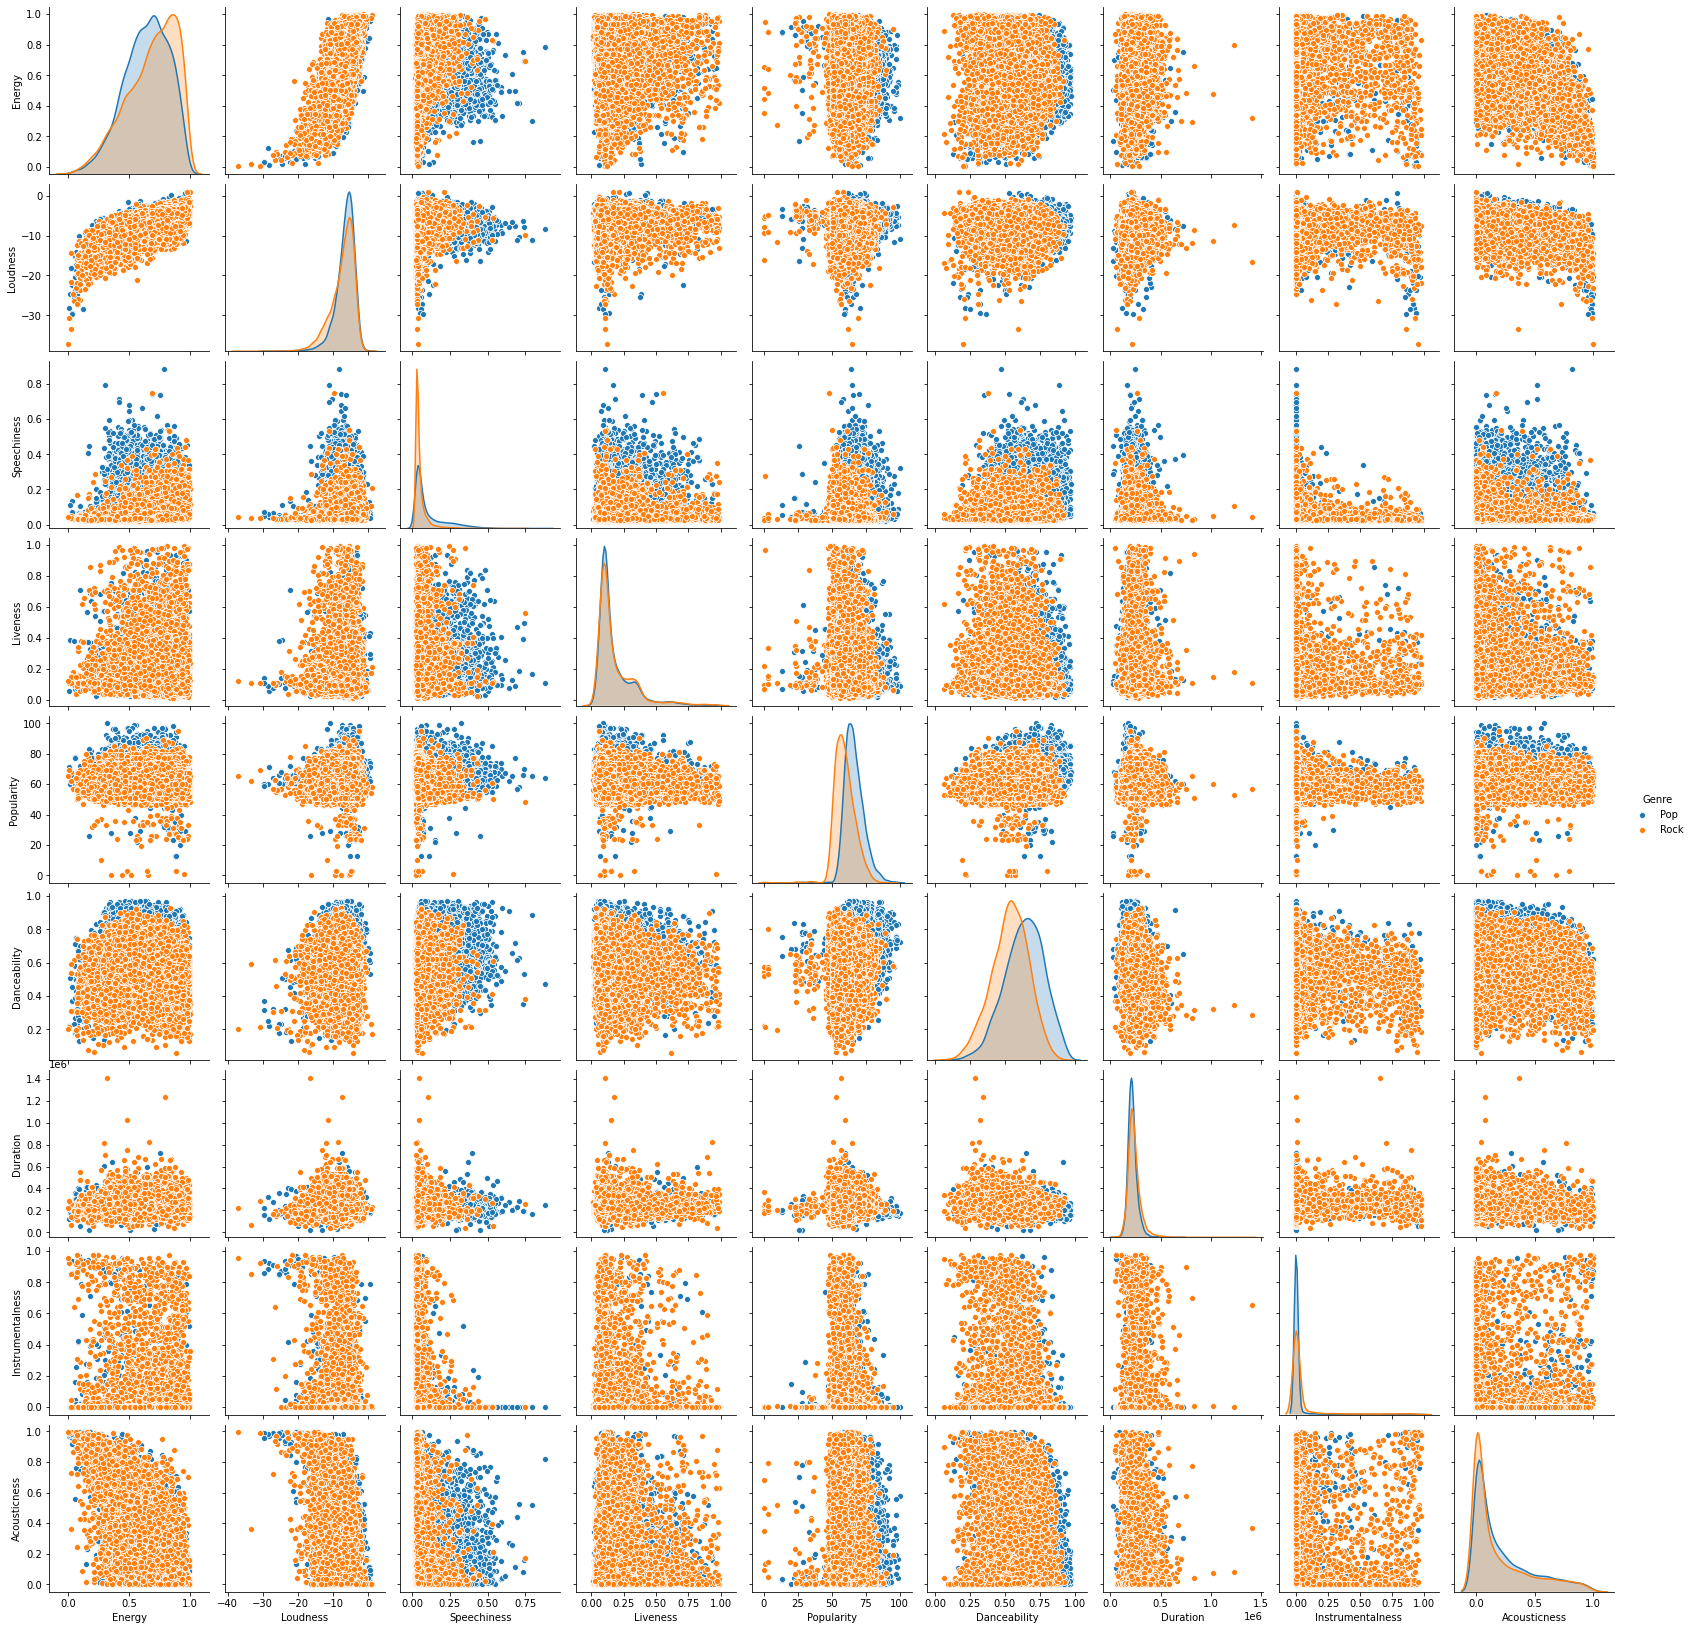

In [15]:
sns.pairplot(train_data, hue="Genre")

Количество уникальных артистов каждого жанра:

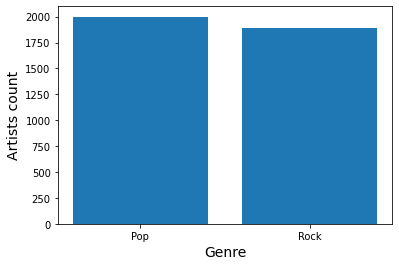

In [16]:
x_genres = np.arange(len(top_genres))
y_artists = train_data.groupby('Genre')['Artist'].unique().agg(len)
plt.bar(x_genres, y_artists)
plt.xticks(x_genres, top_genres)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Artists count', fontsize=14)
plt.show()

Топ-20 исполнителей по количеству песен:

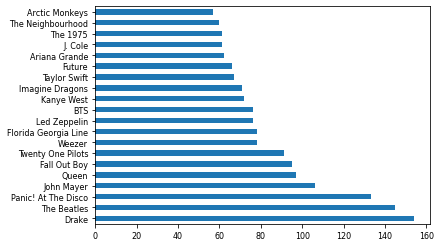

In [17]:
train_data['Artist'].value_counts().head(20).plot(kind='barh', fontsize=8)

## 3. Корреляционный анализ данных

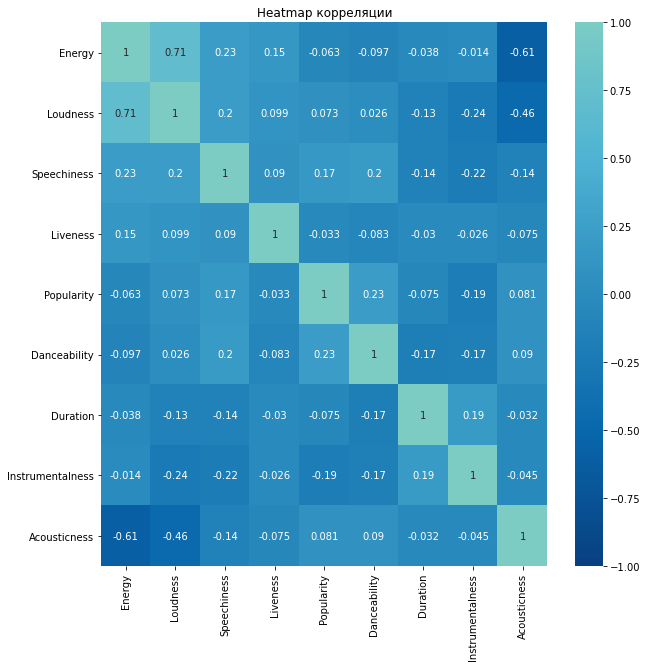

In [18]:
correlation=train_data.corr(method='spearman')
plt.figure(figsize=(10,10))
plt.title('Heatmap корреляции')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

Проверим связь между громкостью и энергичностью:

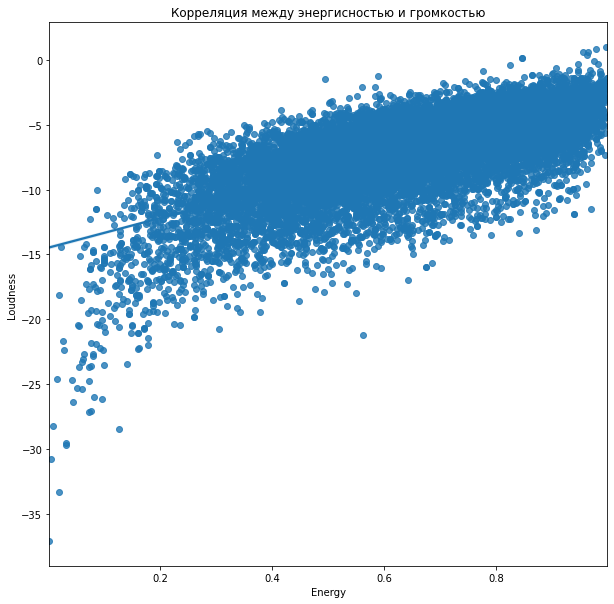

In [19]:
fig=plt.subplots(figsize=(10,10))
plt.title('Корреляция между энергисностью и громкостью')
sns.regplot(x='Energy',y='Loudness',data=train_data)

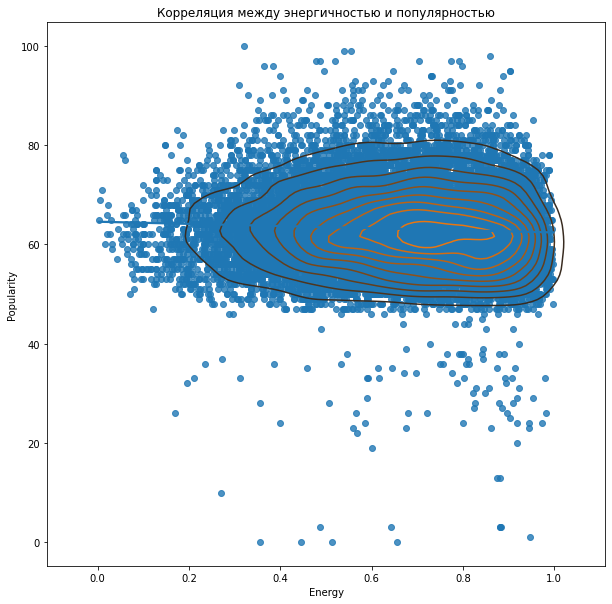

In [20]:
fig=plt.subplots(figsize=(10,10))
plt.title('Корреляция между энергичностью и популярностью')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=train_data)
sns.kdeplot(train_data['Energy'], train_data['Popularity'])

## 4. Метрики для оценки качества моделей

In [21]:
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
class MetricLogger:
                
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [23]:
metricLogger = MetricLogger()

In [24]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    
    print('*' * 80)
    print(model)
    print('*' * 80)
    
    print('precision:', precision)
    print('recall:', recall)
    print('accuracy:', accuracy)
    print('roc_auc:', roc_auc)
    
    print('*' * 80)
    
    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('accuracy', model_name, accuracy)
    metricLogger.add('roc_auc', model_name, roc_auc)
    
    draw_roc_curve(Y_test, y_pred)
    
    plot_confusion_matrix(model, X_test, Y_test, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

## 5. Формирование обучающей и тестовой выборок

In [25]:
features = ['Genre', 'Acousticness', 'Instrumentalness', 'Energy', 'Loudness', 'Speechiness', 'Liveness', 'Danceability', 'Duration', 'Popularity']

In [26]:
train_data_enc = train_data.filter(features)
train_data_enc.head()

,Genre,Acousticness,Instrumentalness,Energy,Loudness,Speechiness,Liveness,Danceability,Duration,Popularity
107802,Pop,0.0421,0.000000,0.554,-5.290,0.0917,0.1060,0.726,190440,99
107803,Pop,0.1630,0.000002,0.539,-7.399,0.1780,0.1010,0.833,149520,99
107804,Pop,0.5780,0.000000,0.321,-10.744,0.3230,0.0884,0.725,178640,100
107805,Pop,0.1490,0.000000,0.364,-11.713,0.2760,0.2710,0.837,213594,96
107806,Pop,0.5560,0.000000,0.479,-5.574,0.0466,0.0703,0.760,158040,97


Выполним кодирование признака жанра:

In [27]:
le = LabelEncoder()
train_data_enc['Genre'] = le.fit_transform(train_data['Genre']);

Разделим выборки:

In [28]:
X = train_data_enc.drop('Genre', axis=1)
Y = train_data_enc['Genre']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(13993, 9), (4665, 9)
(13993,), (4665,)


## 6. Построение базового решения

In [30]:
models = {'KNN_3':KNeighborsClassifier(n_neighbors=3),
          'SVC':SVC(),
          'Tree':DecisionTreeClassifier(),
          'RF':RandomForestClassifier(),
          'GB':GradientBoostingClassifier()}

********************************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
********************************************************************************
precision: 0.5060922541340296
recall: 0.5058721183123097
accuracy: 0.5131832797427652
roc_auc: 0.5130797616075496
********************************************************************************


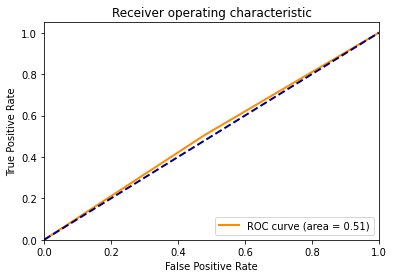

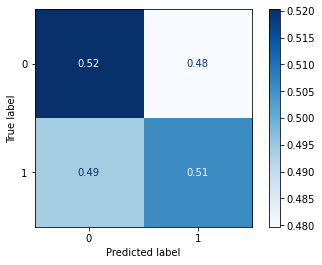

********************************************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
********************************************************************************
precision: 0.6296660117878192
recall: 0.27881687690300133
accuracy: 0.5637727759914255
roc_auc: 0.559738108781171
********************************************************************************


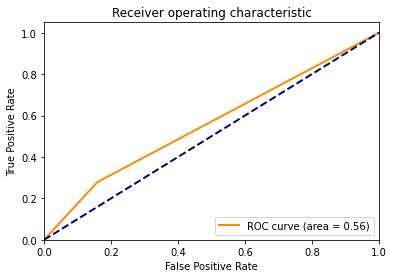

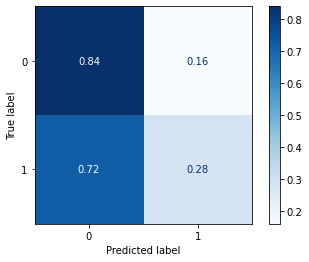

********************************************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
********************************************************************************
precision: 0.6665111940298507
recall: 0.6215745976511526
accuracy: 0.6602357984994641
roc_auc: 0.6596883977266752
********************************************************************************


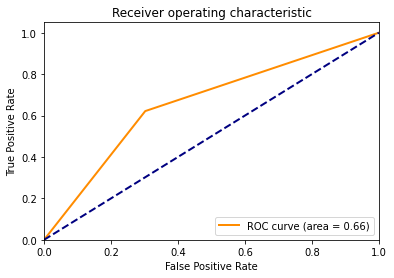

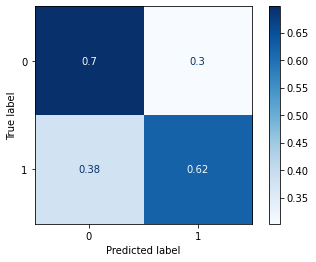

********************************************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
********************************************************************************
precision: 0.7151335311572701
recall: 0.7337973031752936
accuracy: 0.7247588424437299
roc_auc: 0.7248868172681201
********************************************************************************


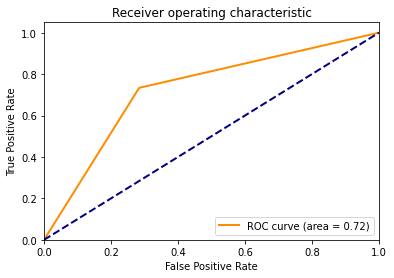

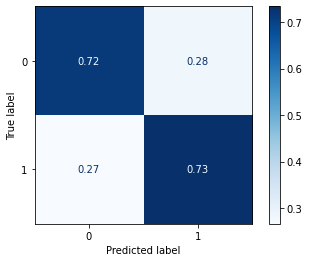

********************************************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
********************************************************************************
precision: 0.7844234079173839
recall: 0.7929534580252283
accuracy: 0.7905680600214362
roc_auc: 0.7906018346761813
***************************

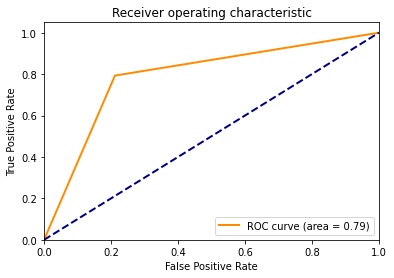

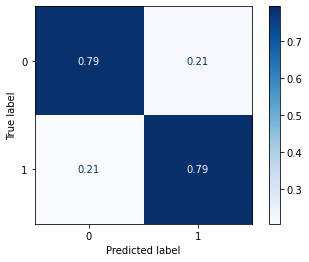

In [31]:
for model_name, model in models.items():
    test_model(model_name, model, metricLogger)

## 7. Подбор гиперпараметров

In [32]:
X_train.shape

(13993, 9)

#### Дерево решений

In [33]:
%%time
tree_parameters = {'max_depth': randint(1, 100)}
clf_gs = RandomizedSearchCV(DecisionTreeClassifier(), tree_parameters, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10)
clf_gs.fit(X, Y)

CPU times: user 554 ms, sys: 98.4 ms, total: 652 ms
Wall time: 6 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [34]:
clf_gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Лучшее значение параметров:

In [35]:
clf_gs.best_params_

{'max_depth': 13}

Средний результат:

In [36]:
clf_gs.cv_results_['mean_test_score']

array([0.63050352, 0.62975309, 0.63034289, 0.65966003, 0.63157523,
       0.62819865, 0.63586335, 0.62959213, 0.62996768, 0.62964593])

#### Градиентный бустинг

In [75]:
%%time
gb_parameters = {'learning_rate': [1e-3, 1e-2, 1e-1], 'subsample': uniform(0.5, 1.0), 'n_estimators': randint(1, 100), 'max_depth': randint(1, 10)}
clf_gs = RandomizedSearchCV(GradientBoostingClassifier(), gb_parameters, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10)
clf_gs.fit(X, Y)

CPU times: user 2.58 s, sys: 94.4 ms, total: 2.68 s
Wall time: 34.2 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [76]:
clf_gs.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=86,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.6653636196806847,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

Лучшее значение параметров:

In [77]:
clf_gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 86,
 'subsample': 0.6653636196806847}

Средний результат:

In [78]:
clf_gs.cv_results_['mean_test_score']

array([0.72628059, 0.73115791,        nan,        nan, 0.69878671,
              nan, 0.71915108,        nan,        nan, 0.72478003])

## 8. Сравнение качества полученных моделей с качеством baseline-моделей

#### Дерево решений

********************************************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
********************************************************************************
precision: 0.6702226345083488
recall: 0.6285341452805567
accuracy: 0.6645230439442658
roc_auc: 0.6640134800789934
********************************************************************************


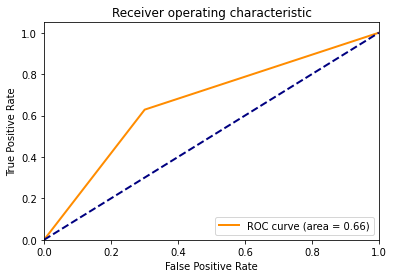

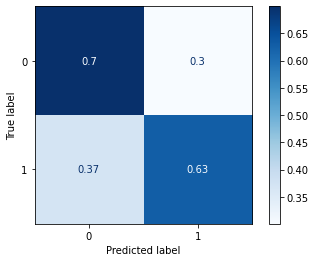

In [60]:
test_model('Tree', DecisionTreeClassifier(), metricLogger)

********************************************************************************
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',


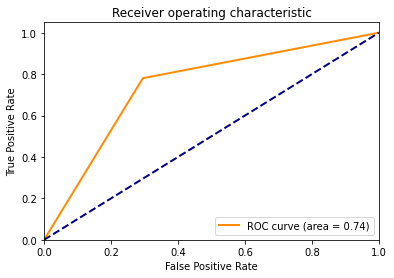

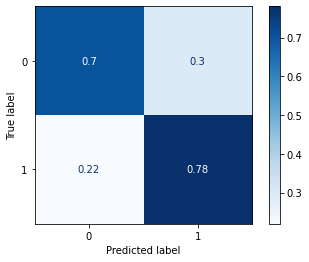

In [61]:
test_model('Tree_tuned', RandomizedSearchCV(DecisionTreeClassifier(), tree_parameters, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10), metricLogger)

#### Градиентный бустинг

********************************************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
********************************************************************************
precision: 0.7844234079173839
recall: 0.7929534580252283
accuracy: 0.7905680600214362
roc_auc: 0.7906018346761813
***************************

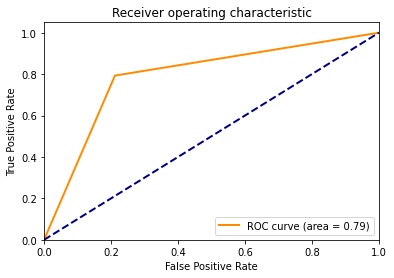

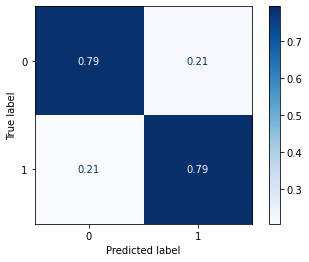

In [79]:
test_model('GB', GradientBoostingClassifier(), metricLogger)

********************************************************************************
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                

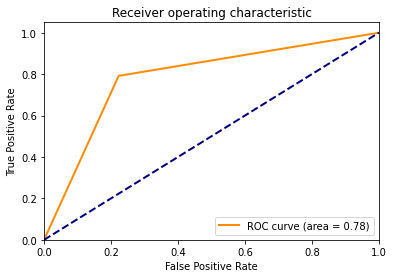

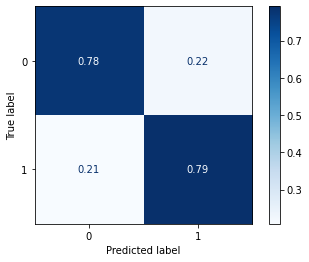

In [80]:
test_model('GB_tuned', RandomizedSearchCV(GradientBoostingClassifier(), gb_parameters, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10), metricLogger)

## 9. Выводы о качестве построенных моделей

In [81]:
metrics = ['precision', 'recall', 'accuracy', 'roc_auc']
metrics

['precision', 'recall', 'accuracy', 'roc_auc']

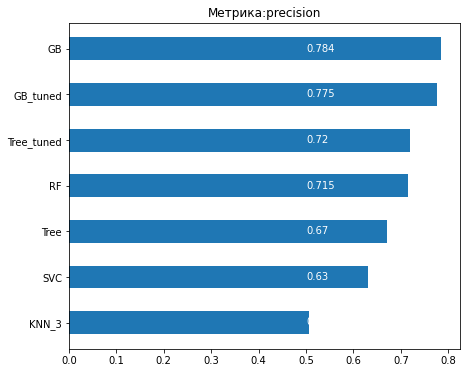

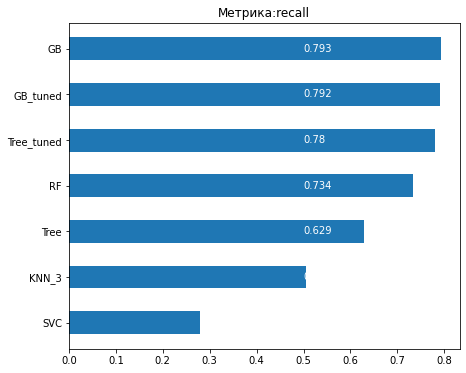

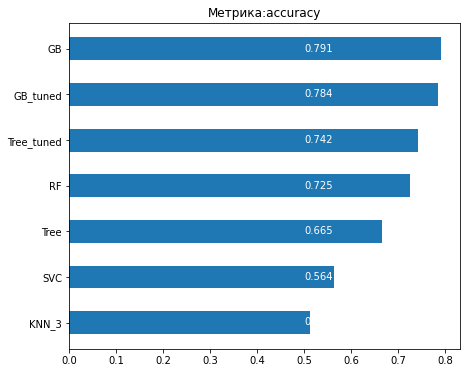

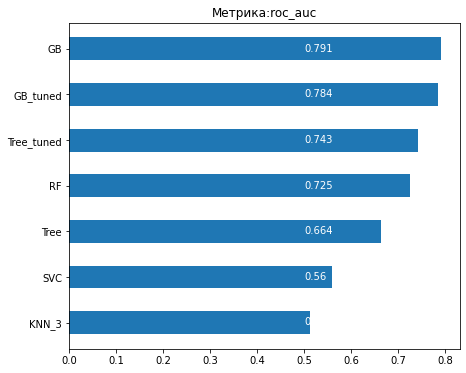

In [82]:
for metric in metrics:
    metricLogger.plot('Метрика:' + metric, metric, figsize=(7, 6))

   ## 10. Вывод

Было использовано 5 моделей, для двух из них был проведен подбор гиперпараметров - дерево решений и градиентный бустинг. Лучше всего себя показала модель gradient boosting. Худший результат показали модели KNN и SVC с точностью 0,5. В результате подбора гиперпараметров удалось улучшить точность модели decision tree, однако для модели gradient boosting изменение результатов было незначительным.